# Project: Pricing Asian option with Binomial tree method
data source: \
https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD; \
https://finance.yahoo.com/quote/ETH-USD/history?p=ETH-USD; \
https://www.deribit.com/main#/options?tab=BTC-2MAR21

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as wb
import time
from scipy.stats import norm

## 1. Download underlying asset's price data, analyze the data, estimate log return mean, volatility, and other parameter values. consider two risk-free rates: ·r = 1% and r=5% 

In [13]:
# Get data from yahoo source:
BTC=wb.DataReader('BTC-USD', data_source='yahoo',start='2018-1-1')
# BTC.info()
ETH=wb.DataReader('ETH-USD', data_source='yahoo',start='2018-1-1')
# ETH.info()
price_BTC = BTC['Adj Close']
price_ETH = ETH['Adj Close']

/Users/kenneth/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


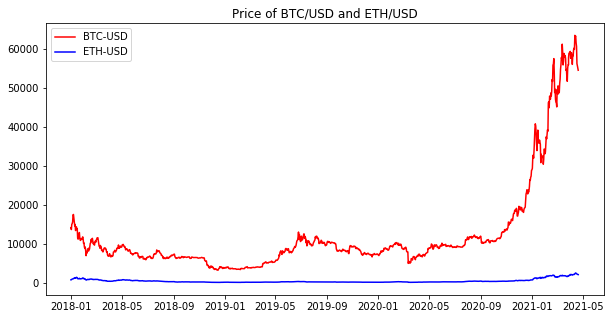

In [14]:
#%% visualize the price
plt.figure(figsize = (10,5))
plt.plot(price_BTC,color = "Red",label = "BTC-USD")
plt.plot(price_ETH,color = "Blue",label = "ETH-USD")
plt.legend()
plt.title("Price of BTC/USD and ETH/USD")
plt.show()

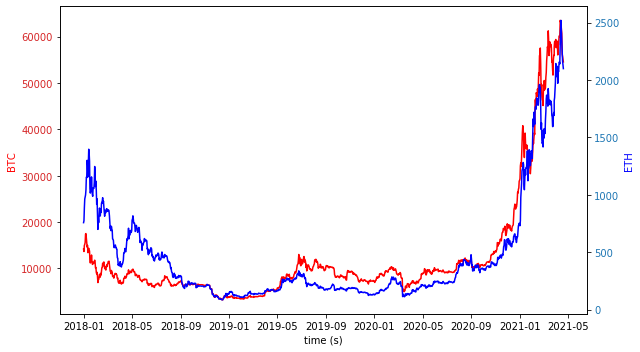

In [15]:
#separate 2 y-axis to compare the evolution of BTC and ETH prices
fig, ax1 = plt.subplots(figsize = (9,5))
color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('BTC', color="Red")
ax1.plot( price_BTC, color="Red")
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('ETH', color="Blue")  
ax2.plot(price_ETH, color="Blue")
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  
plt.show()

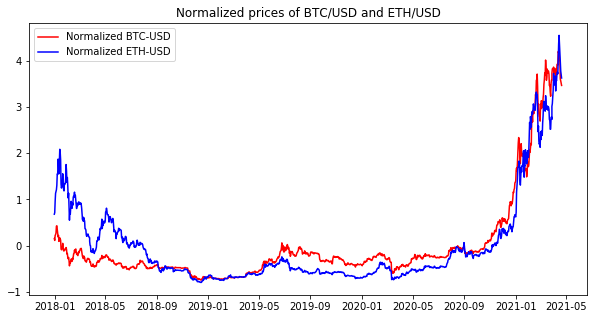

In [16]:
#plot the normalized figures
plt.figure(figsize = (10,5))
plt.plot((price_BTC-np.mean(BTC['Adj Close']))/np.std(BTC['Adj Close']),color = "Red",label = "Normalized BTC-USD")
plt.plot((price_ETH-np.mean(ETH['Adj Close']))/np.std(ETH['Adj Close']),color = "Blue",label = "Normalized ETH-USD")
plt.legend()
plt.title("Normalized prices of BTC/USD and ETH/USD")
plt.show()

#Analyze data

In [17]:
#log return, volatility
log_ret_BTC = np.log(price_BTC).diff().iloc[1::]
log_ret_ETH = np.log(price_ETH).diff().iloc[1::]
print("average return of BTC: ", np.mean(log_ret_BTC))
print("average return of ETH: ", np.mean(log_ret_ETH))
print("volatility of BTC price: ", np.std(log_ret_BTC))
print("volatility of ETH price: ", np.std(log_ret_ETH))

average return of BTC:  0.0011222594068337663
average return of ETH:  0.0008487011314255292
volatility of BTC price:  0.040213226497934365
volatility of ETH price:  0.05148287132739567


In [18]:

def BTM(strike_type,option_type,S0, K, r, sigma, T, N):
    deltaT = T/ N
    u = np.exp(sigma*np.sqrt(deltaT))
    d = 1 / u
    proba = (np.exp(r*deltaT) - d)/ (u - d)
    St=[S0]
    At=[S0]
    strike=[K]
    # Compute the leaves S_{N, j} and the average price A_{N, j}
    for i in range(N):
        St= [j* u for j in St]+[j * d for j in St]
        At+=At
        strike+=strike
        for x in range(len(At)):
            At[x]= At[x]+St[x]
    At=np.array(At)/(N+1)
    if strike_type == "fixed":
        if option_type == "C":
            payoff = np.maximum(At-np.array(strike), 0)
        else:
            payoff = np.maximum(np.array(strike)-At, 0)
    else:
        if option_type =="C":
            payoff = np.maximum(np.array(St)-At, 0)
        else:
            payoff = np.maximum(At-np.array(St), 0)
    #calculate backward the option prices
    option_price  = payoff
    for i in range(N):
        length = int(len(option_price)/2)
        option_price = proba*option_price[0:length]+(1-proba)*option_price[length::]  
    return option_price[0]

### Sensitivity to maturity

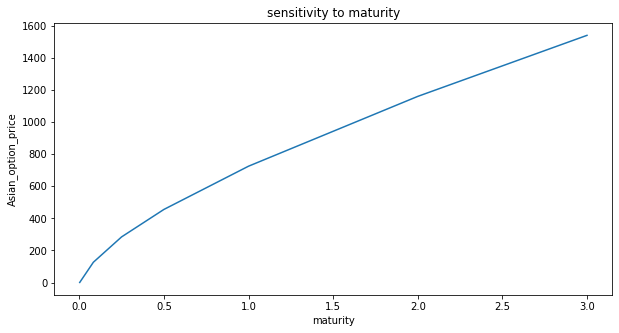

In [19]:
range_T=[1/365,1/12,1/4,1/2,1,2,3]
option_price = []
for i in range_T:
    Asian_option = BTM("fixed","C",S0=57830,K=58000,r=0.01,sigma=0.05,T=i,N=10)
    option_price.append(Asian_option)
plt.figure(figsize=(10,5))
plt.plot(range_T,option_price)
plt.xlabel("maturity")
plt.ylabel("Asian_option_price")
plt.title("sensitivity to maturity")
plt.show()

### Sensitivity to number of steps

--- 2  steps took  0.0 seconds ---
--- 3  steps took  0.0 seconds ---
--- 4  steps took  0.0 seconds ---
--- 5  steps took  0.0 seconds ---
--- 6  steps took  0.0 seconds ---
--- 7  steps took  0.0 seconds ---
--- 8  steps took  0.0 seconds ---
--- 9  steps took  0.0 seconds ---
--- 10  steps took  0.0 seconds ---
--- 11  steps took  0.0 seconds ---
--- 12  steps took  0.0 seconds ---
--- 13  steps took  0.01 seconds ---
--- 14  steps took  0.01 seconds ---
--- 15  steps took  0.05 seconds ---
--- 16  steps took  0.05 seconds ---
--- 17  steps took  0.08 seconds ---
--- 18  steps took  0.18 seconds ---
--- 19  steps took  0.59 seconds ---
--- 20  steps took  1.19 seconds ---
--- 21  steps took  1.82 seconds ---
--- 22  steps took  3.24 seconds ---
--- 23  steps took  5.97 seconds ---
--- 24  steps took  12.32 seconds ---
--- 25  steps took  29.79 seconds ---


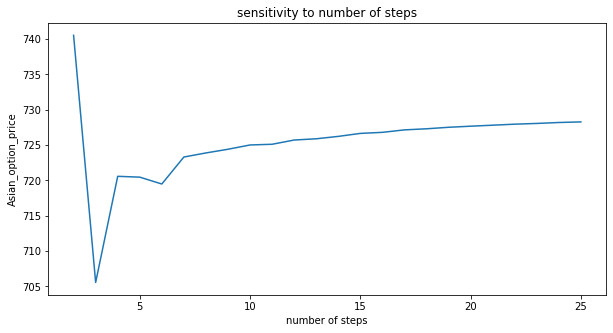

In [20]:
range_N=np.array([2,3,4,5,]+[6+j for j in range(20)])
option_price = []
for i in range_N:
    start_time = time.time()
    Asian_option = BTM("fixed","C",S0=57830,K=58000,r=0.01,sigma=0.05,T=1,N=i)
    option_price.append(Asian_option)
    print("---",i," steps took ","%s seconds ---" % round(time.time() - start_time,2))
plt.figure(figsize=(10,5))
plt.plot(range_N,option_price)
plt.xlabel("number of steps")
plt.ylabel("Asian_option_price")
plt.title("sensitivity to number of steps")
plt.show()

### Sensitivity to spot and strike prices

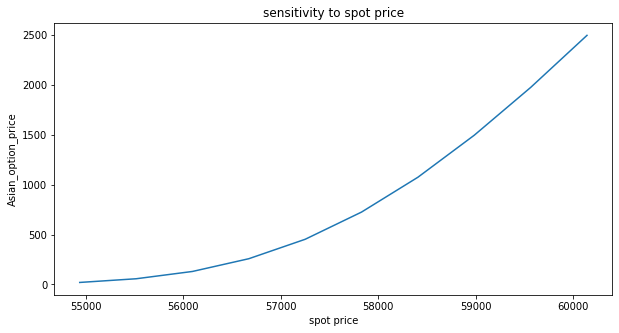

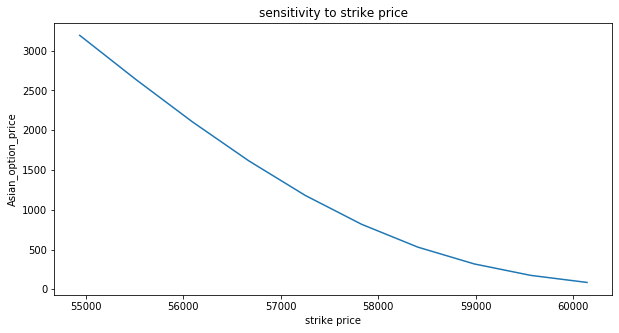

In [21]:
range_price=np.array([57830*(0.95+0.01*j) for j in range(10)])
option_price = []
for i in range_price:
    Asian_option = BTM("fixed","C",S0=i,K=58000,r=0.01,sigma=0.05,T=1,N=10)
    option_price.append(Asian_option)
plt.figure(figsize=(10,5))
plt.plot(range_price,option_price)
plt.xlabel("spot price")
plt.ylabel("Asian_option_price")
plt.title("sensitivity to spot price")
plt.show()

option_price = []
for i in range_price:
    Asian_option = BTM("fixed","C",S0=57830,K=i,r=0.01,sigma=0.05,T=1,N=10)
    option_price.append(Asian_option)
plt.figure(figsize=(10,5))
plt.plot(range_price,option_price)
plt.xlabel("strike price")
plt.ylabel("Asian_option_price")
plt.title("sensitivity to strike price")
plt.show()

## Modified BTM

In [22]:
def HW_BTM(strike_type,option_type,S0,K,r,sigma,T,step,M):
    N=step
    deltaT=T/step
    u = np.exp(sigma*np.sqrt(deltaT))
    d = 1 / u
    proba = (np.exp(r*deltaT) - d)/ (u - d)
    #calculate average price at note (N,J)
    At=[]    
    St=[]
    strike=np.array([K]*M)
    
    for J in range(N+1):
        At_max = np.array([(S0 * u**(j) * d**0) for j in range(N-J)]+[(S0 * u**(N-J) * d**(j)) for j in range(J+1)])
        At_max = np.sum(At_max)/len(At_max)
        At_min = np.array([(S0 * d**(j) * u**0) for j in range(J+1)]+[(S0 * d**(J) * u**(j+1)) for j in range(N-J)])
        At_min = np.sum(At_min)/len(At_min)
        diff=At_max-At_min
        At+=[[At_max-diff/(M-1)*k for k in range(M)]]
        St=np.array([S0* u**(N-J) * d**J]*M)
        if strike_type == "fixed":
            if option_type == "C":
                payoff = np.maximum(At-strike, 0)
            else:
                payoff = np.maximum(strike-At, 0)
        else:
            if option_type =="C":
                payoff = np.maximum(St-At, 0)
            else:
                payoff = np.maximum(At-St, 0)
    At=np.round(At,4)
    payoff=np.round(payoff,4)
               
    for N in range(step-1,-1,-1):
        At_backward=[]
        At_new=[]
        for J in range(N+1):
            At_max = np.array([(S0 * u**(j) * d**0) for j in range(N-J)]+[(S0 * u**(N-J) * d**(j)) for j in range(J+1)])
            At_max = np.sum(At_max)/len(At_max)
            At_min = np.array([(S0 * d**(j) * u**0) for j in range(J+1)]+[(S0 * d**(J) * u**(j+1)) for j in range(N-J)])
            At_min = np.sum(At_min)/len(At_min)
            diff= At_max-At_min
            At_backward+=[[At_max-diff/(M-1)*k for k in range(M)]]
            St_u=np.array([S0* u**(N+1-J) * d**J]*M)
            St_d=np.array([S0* u**(N-J) * d**(J+1)]*M)
            At_new.append(((N+1)*np.array(At_backward[J])+St_u)/(N+2))
            At_new.append(((N+1)*np.array(At_backward[J])+St_d)/(N+2))
            
        At_backward=np.round(At_backward,4)
        At_new=np.round(At_new,4)
        payoff_new=At_new*0
        payoff_backward=At_backward*0
        for i in range(len(At_backward)):
            for j in range(len(At[i])):
                if At[i][j]==At_new[2*i][j]:
                    payoff_new[2*i][j]=payoff[i][j]
                else:
                    x=(At[i][j]-At_new[2*i][j])*payoff[i][j+1]
                    y=(At_new[2*i][j]-At[i][j+1])*payoff[i][j]
                    payoff_new[2*i][j]= (x+y)/(At[i][j]-At[i][j+1])
                
                if At[i+1][j]==At_new[2*i+1][j]:
                    payoff_new[2*i+1][j]=payoff[i+1][j]
                else:
                    x=(At[i+1][j-1]-At_new[2*i+1][j])*payoff[i+1][j]
                    y=(At_new[2*i+1][j]-At[i+1][j])*payoff[i+1][j-1]
                    payoff_new[2*i+1][j]= (x+y)/(At[i+1][j-1]-At[i+1][j])
            payoff_backward[i]=(payoff_new[2*i]*proba+payoff_new[2*i+1]*(1-proba))*np.exp(-r*deltaT)
        At=At_backward
        payoff=np.round(payoff_backward,4)
    option_price = np.average(payoff)
    return option_price

### Sensitivity to maturity

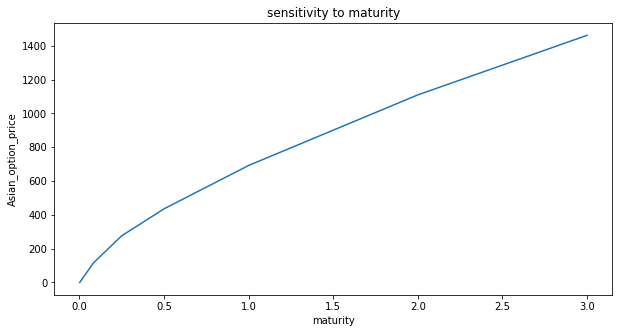

In [23]:
range_T=[1/365,1/12,1/4,1/2,1,2,3]
option_price = []
for i in range_T:
    Asian_option = HW_BTM("fixed","C",S0=57830,K=58000,r=0.01,sigma=0.05,T=i,step=10,M=10)
    option_price.append(Asian_option)
plt.figure(figsize=(10,5))
plt.plot(range_T,option_price)
plt.xlabel("maturity")  
plt.ylabel("Asian_option_price")
plt.title("sensitivity to maturity")
plt.show()


### Sensitivity to number of steps

--- 2  steps took  0.0 seconds ---
--- 3  steps took  0.0 seconds ---
--- 4  steps took  0.0 seconds ---
--- 5  steps took  0.0 seconds ---
--- 6  steps took  0.0 seconds ---
--- 7  steps took  0.0 seconds ---
--- 8  steps took  0.0 seconds ---
--- 9  steps took  0.01 seconds ---
--- 10  steps took  0.01 seconds ---
--- 11  steps took  0.01 seconds ---
--- 12  steps took  0.01 seconds ---
--- 13  steps took  0.01 seconds ---
--- 14  steps took  0.01 seconds ---
--- 15  steps took  0.02 seconds ---
--- 16  steps took  0.02 seconds ---
--- 17  steps took  0.02 seconds ---
--- 18  steps took  0.02 seconds ---
--- 19  steps took  0.02 seconds ---
--- 20  steps took  0.05 seconds ---
--- 21  steps took  0.04 seconds ---
--- 22  steps took  0.04 seconds ---
--- 23  steps took  0.05 seconds ---
--- 24  steps took  0.05 seconds ---
--- 25  steps took  0.05 seconds ---
--- 26  steps took  0.06 seconds ---
--- 27  steps took  0.07 seconds ---
--- 28  steps took  0.07 seconds ---
--- 29  steps to

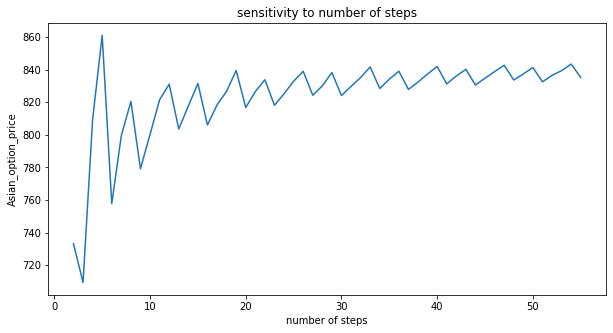

In [24]:
range_N=np.array([2,3,4,5,]+[6+j for j in range(50)])
option_price = []
for i in range_N:
    start_time = time.time()
    Asian_option = HW_BTM("fixed","C",S0=57830,K=58000,r=0.01,sigma=0.05,T=1,step=i,M=round(i/3.5)+1)
    option_price.append(Asian_option)
    print("---",i," steps took ","%s seconds ---" % round(time.time() - start_time,2))
plt.figure(figsize=(10,5))
plt.plot(range_N,option_price)
plt.xlabel("number of steps")
plt.ylabel("Asian_option_price")
plt.title("sensitivity to number of steps")
plt.show()

### Sensitivity to spot and strike prices

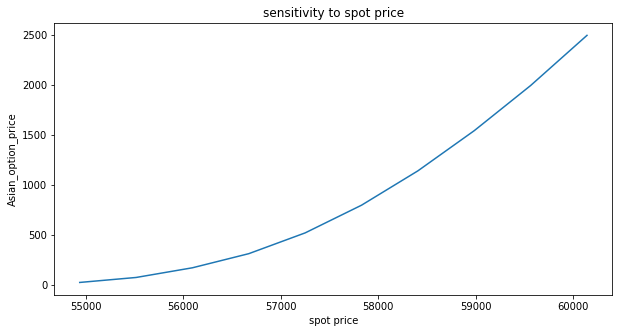

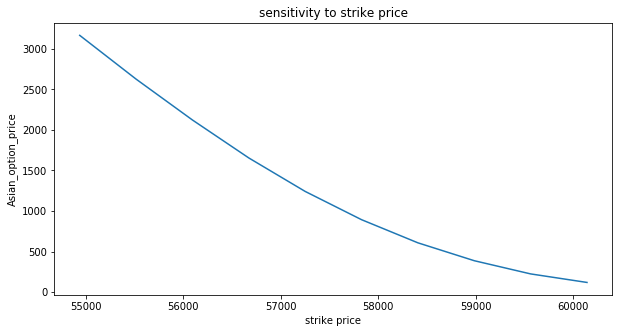

In [25]:
range_price=np.array([57830*(0.95+0.01*j)  for j in range(10)])
option_price = []
for i in range_price:
    Asian_option = HW_BTM("fixed","C",S0=i,K=58000,r=0.01,sigma=0.05,T=1,step=10,M=4)
    option_price.append(Asian_option)
plt.figure(figsize=(10,5))
plt.plot(range_price,option_price)
plt.xlabel("spot price")
plt.ylabel("Asian_option_price")
plt.title("sensitivity to spot price")
plt.show()

option_price = []
for i in range_price:
    Asian_option = HW_BTM("fixed","C",S0=57830,K=i,r=0.01,sigma=0.05,T=1,step=10,M=4)
    option_price.append(Asian_option)
plt.figure(figsize=(10,5))
plt.plot(range_price,option_price)
plt.xlabel("strike price")
plt.ylabel("Asian_option_price")
plt.title("sensitivity to strike price")
plt.show()

## Black-Schole formula for European options:

In [26]:
def BS_option_price(t,St,K,T,r,sigma,Type):
    d1=(np.log(St/K)+(r+0.5*sigma**2)*(T-t))/sigma*np.sqrt(T-t)
    d2=d1-sigma*np.sqrt(T-t)
 
    if Type == 'call':
        option_price=St*norm.cdf(d1)-K*np.exp(-r*(T-t))*norm.cdf(d2)

    elif Type == 'put':
        option_price=K*np.exp(-r*(T-t))*norm.cdf(-d2)-St*norm.cdf(-d1)
    return option_price

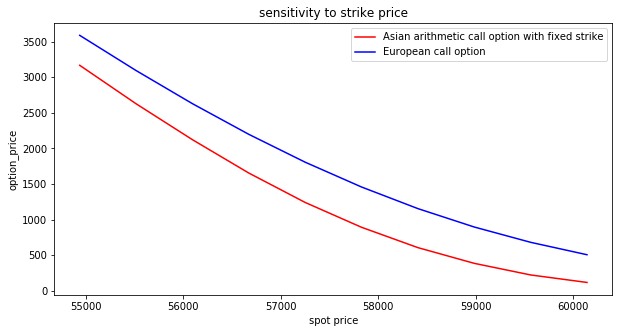

In [27]:
range_price=np.array([57830*(0.95+0.01*j)  for j in range(10)])
option1 = []
option2 = []
for i in range_price:
    Asian_option = HW_BTM("fixed","C",S0=57830,K=i,r=0.01,sigma=0.05,T=1,step=10,M=4)
    European_option = BS_option_price(t=0,St=57830,K=i,T=1,r=0.01,sigma=0.05,Type="call")
    option1.append(Asian_option)
    option2.append(European_option)
plt.figure(figsize=(10,5))
plt.plot(range_price,option1,color="Red",label="Asian arithmetic call option with fixed strike")
plt.plot(range_price,option2,color="Blue",label="European call option")
plt.xlabel("spot price")
plt.ylabel("option_price")
plt.legend()
plt.title("sensitivity to strike price")
plt.show()

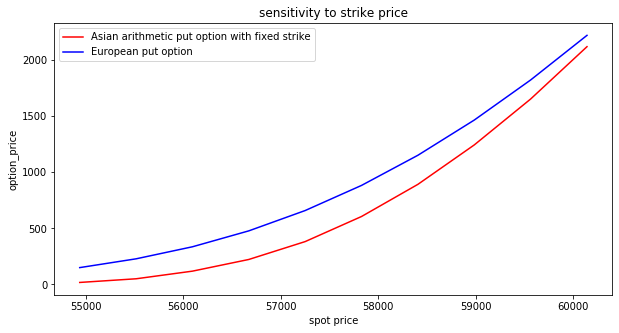

In [28]:
option1 = []
option2 = []
for i in range_price:
    Asian_option = HW_BTM("fixed","P",S0=57830,K=i,r=0.01,sigma=0.05,T=1,step=10,M=4)
    European_option = BS_option_price(t=0,St=57830,K=i,T=1,r=0.01,sigma=0.05,Type="put")
    option1.append(Asian_option)
    option2.append(European_option)
plt.figure(figsize=(10,5))
plt.plot(range_price,option1,color="Red",label="Asian arithmetic put option with fixed strike")
plt.plot(range_price,option2,color="Blue",label="European put option")
plt.xlabel("spot price")
plt.ylabel("option_price")
plt.legend()
plt.title("sensitivity to strike price")
plt.show()

In [29]:
def vanilla_option_delta(t, St, K, T, r, sigma, Type, epsilon = 0.01):
    return ((BS_option_price(t, St+epsilon, K, T, r, sigma, Type) - BS_option_price(t, St, K, T, r, sigma, Type))/(epsilon))

def asian_option_delta(strike_type, option_type, S0, K, r, sigma, T, step, M, epsilon = 0.01):
    return ((HW_BTM(strike_type, option_type, S0+epsilon, K, r, sigma, T, step, M) - HW_BTM(strike_type, option_type, S0, K, r, sigma, T, step, M))/(epsilon))


In [30]:
def vanilla_option_gamma(t, St, K, T, r, sigma, Type, epsilon = 0.01):
    return ((vanilla_option_delta(t, St+epsilon, K, T, r, sigma, Type, epsilon) - vanilla_option_delta(t, St, K, T, r, sigma, Type, epsilon))/(epsilon))

def asian_option_gamma(strike_type, option_type, S0, K, r, sigma, T, step, M, epsilon = 0.01):
    return ((asian_option_delta(strike_type, option_type, S0+epsilon, K, r, sigma, T, step, M, epsilon) - asian_option_delta(strike_type, option_type, S0, K, r, sigma, T, step, M, epsilon))/(epsilon))


In [93]:
def vanilla_option_vega(t, St, K, T, r, sigma, Type, epsilon = 0.01):
    return ((BS_option_price(t, St, K, T, r, sigma+epsilon, Type) - BS_option_price(t, St, K, T, r, sigma, Type))/(epsilon*100))

def asian_option_vega(strike_type, option_type, S0, K, r, sigma, T, step, M, epsilon = 0.01):
    return ((HW_BTM(strike_type, option_type, S0, K, r, sigma+epsilon, T, step, M) - HW_BTM(strike_type, option_type, S0, K, r, sigma, T, step, M))/(epsilon*100))


# HW_BTM(strike_type,option_type,S0,K,r,sigma,T,step,M)

In [118]:
def vanilla_option_theta(t, St, K, T, r, sigma, Type, epsilon = 0.01):
    return ((BS_option_price(t, St, K, T-epsilon, r, sigma, Type) - BS_option_price(t, St, K, T, r, sigma, Type))/(epsilon*365))

def asian_option_theta(strike_type, option_type, S0, K, r, sigma, T, step, M, epsilon = 0.01):
    return ((HW_BTM(strike_type, option_type, S0, K, r, sigma, T-epsilon, step, M) - HW_BTM(strike_type, option_type, S0, K, r, sigma, T, step, M))/(epsilon*365))


In [98]:
def vanilla_option_rho(t, St, K, T, r, sigma, Type, epsilon = 0.01):
    return ((BS_option_price(t, St, K, T, r+epsilon, sigma, Type) - BS_option_price(t, St, K, T, r, sigma, Type))/(epsilon*100))

def asian_option_rho(strike_type, option_type, S0, K, r, sigma, T, step, M, epsilon = 0.01):
    return ((HW_BTM(strike_type, option_type, S0, K, r+epsilon, sigma, T, step, M) - HW_BTM(strike_type, option_type, S0, K, r, sigma, T, step, M))/(epsilon*100))


## Compare the Greeks  of  Asian  option and Vanilla option for Bitcoin

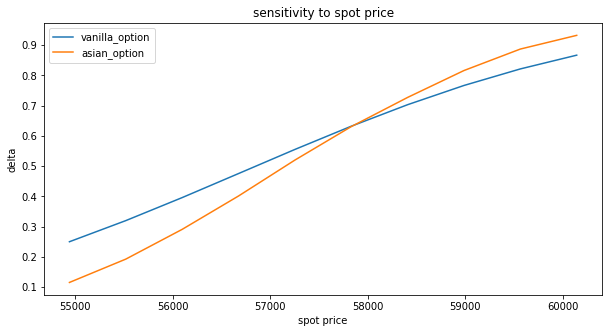

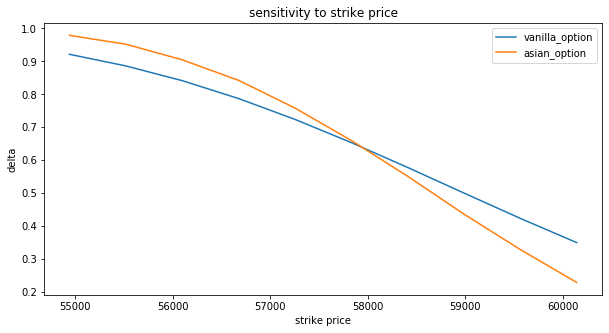

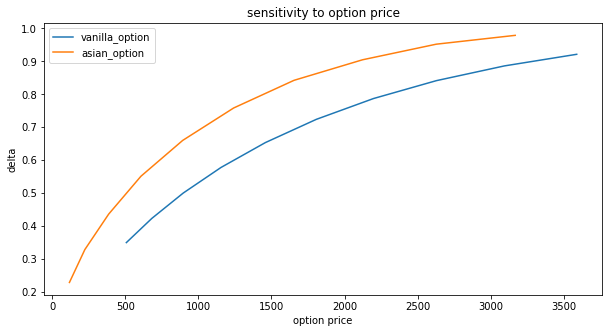

In [117]:
# Delta comparason:
range_price=np.array([57830*(0.95+0.01*j)  for j in range(10)])
vanilla_delta = []
asian_delta = []
for i in range_price:
    
    Vanilla_option = vanilla_option_delta(t=0,St=i,K=58000,T=1,r=0.01,sigma=0.05,Type="call",epsilon=1000)
    vanilla_delta.append(Vanilla_option)
    
    Asian_option = asian_option_delta("fixed","C",S0=i,K=58000,r=0.01,sigma=0.05,T=1,step=10,M=4,epsilon=1000)
    asian_delta.append(Asian_option)
    

    
plt.figure(figsize=(10,5))
plt.plot(range_price,vanilla_delta,label='vanilla_option')
plt.plot(range_price,asian_delta,label='asian_option')

plt.xlabel("spot price")
plt.ylabel("delta")
plt.title("sensitivity to spot price")
plt.legend()




range_price=np.array([57830*(0.95+0.01*j)  for j in range(10)])
vanilla_delta = []
asian_delta = []
for i in range_price:
    
    Vanilla_option = vanilla_option_delta(t=0,St=57830,K=i,T=1,r=0.01,sigma=0.05,Type="call",epsilon=1000)
    vanilla_delta.append(Vanilla_option)
    
    Asian_option = asian_option_delta("fixed","C",S0=57830,K=i,r=0.01,sigma=0.05,T=1,step=10,M=4,epsilon=1000)
    asian_delta.append(Asian_option)
    

    
plt.figure(figsize=(10,5))
plt.plot(range_price,vanilla_delta,label='vanilla_option')
plt.plot(range_price,asian_delta,label='asian_option')

plt.xlabel("strike price")
plt.ylabel("delta")
plt.title("sensitivity to strike price")
plt.legend()





range_price=np.array([57830*(0.95+0.01*j)  for j in range(10)])

vanilla_price= []
asian_price = []
vanilla_delta = []
asian_delta = []

for i in range_price:
    
    Vanilla_option = vanilla_option_delta(t=0,St=57830,K=i,T=1,r=0.01,sigma=0.05,Type="call",epsilon=1000)
    vanilla_delta.append(Vanilla_option)
    
    Vanilla_option = BS_option_price(t=0,St=57830,K=i,T=1,r=0.01,sigma=0.05,Type="call")
    vanilla_price.append(Vanilla_option)
    
    
    Asian_option = asian_option_delta("fixed","C",S0=57830,K=i,r=0.01,sigma=0.05,T=1,step=10,M=4,epsilon=1000)
    asian_delta.append(Asian_option)
    
    Asian_option = HW_BTM("fixed","C",S0=57830,K=i,r=0.01,sigma=0.05,T=1,step=10,M=4)
    asian_price.append(Asian_option)
    

    
plt.figure(figsize=(10,5))
plt.plot(vanilla_price,vanilla_delta,label='vanilla_option')
plt.plot(asian_price,asian_delta,label='asian_option')

plt.xlabel("option price")
plt.ylabel("delta")
plt.title("sensitivity to option price")
plt.legend()


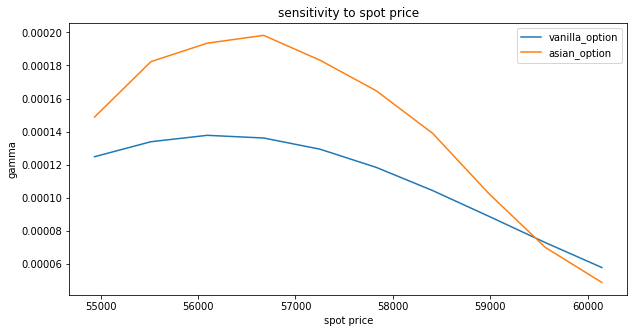

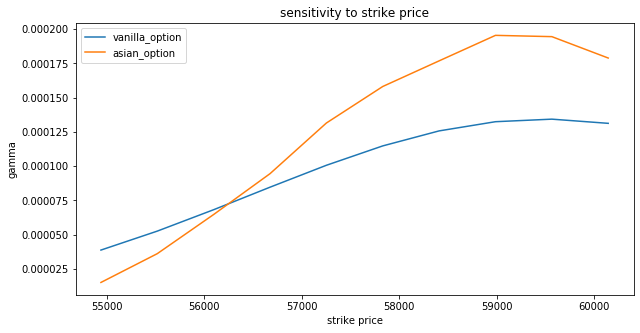

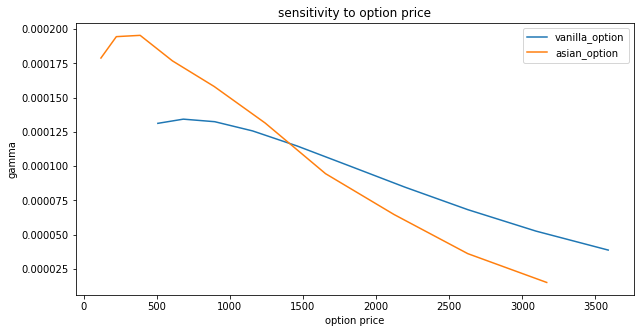

In [125]:
# Gamma comparason:
range_price=np.array([57830*(0.95+0.01*j)  for j in range(10)])
vanilla_gamma = []
asian_gamma = []
for i in range_price:
    
    Vanilla_option = vanilla_option_gamma(t=0,St=i,K=58000,T=1,r=0.01,sigma=0.05,Type="call",epsilon=1000)
    vanilla_gamma.append(Vanilla_option)
    
    Asian_option = asian_option_gamma("fixed","C",S0=i,K=58000,r=0.01,sigma=0.05,T=1,step=10,M=4,epsilon=1000)
    asian_gamma.append(Asian_option)
    

    
plt.figure(figsize=(10,5))
plt.plot(range_price,vanilla_gamma,label='vanilla_option')
plt.plot(range_price,asian_gamma,label='asian_option')

plt.xlabel("spot price")
plt.ylabel("gamma")
plt.title("sensitivity to spot price")
plt.legend()




range_price=np.array([57830*(0.95+0.01*j)  for j in range(10)])
vanilla_gamma = []
asian_gamma = []
for i in range_price:
    
    Vanilla_option = vanilla_option_gamma(t=0,St=57830,K=i,T=1,r=0.01,sigma=0.05,Type="call",epsilon=1000)
    vanilla_gamma.append(Vanilla_option)
    
    Asian_option = asian_option_gamma("fixed","C",S0=57830,K=i,r=0.01,sigma=0.05,T=1,step=10,M=4,epsilon=1000)
    asian_gamma.append(Asian_option)
    

    
plt.figure(figsize=(10,5))
plt.plot(range_price,vanilla_gamma,label='vanilla_option')
plt.plot(range_price,asian_gamma,label='asian_option')

plt.xlabel("strike price")
plt.ylabel("gamma")
plt.title("sensitivity to strike price")
plt.legend()





range_price=np.array([57830*(0.95+0.01*j)  for j in range(10)])

vanilla_price= []
asian_price = []
vanilla_gamma = []
asian_gamma = []

for i in range_price:
    
    Vanilla_option = vanilla_option_gamma(t=0,St=57830,K=i,T=1,r=0.01,sigma=0.05,Type="call",epsilon=1000)
    vanilla_gamma.append(Vanilla_option)
    
    Vanilla_option = BS_option_price(t=0,St=57830,K=i,T=1,r=0.01,sigma=0.05,Type="call")
    vanilla_price.append(Vanilla_option)
    
    
    Asian_option = asian_option_gamma("fixed","C",S0=57830,K=i,r=0.01,sigma=0.05,T=1,step=10,M=4,epsilon=1000)
    asian_gamma.append(Asian_option)
    
    Asian_option = HW_BTM("fixed","C",S0=57830,K=i,r=0.01,sigma=0.05,T=1,step=10,M=4)
    asian_price.append(Asian_option)
    

    
plt.figure(figsize=(10,5))
plt.plot(vanilla_price,vanilla_gamma,label='vanilla_option')
plt.plot(asian_price,asian_gamma,label='asian_option')

plt.xlabel("option price")
plt.ylabel("gamma")
plt.title("sensitivity to option price")
plt.legend()


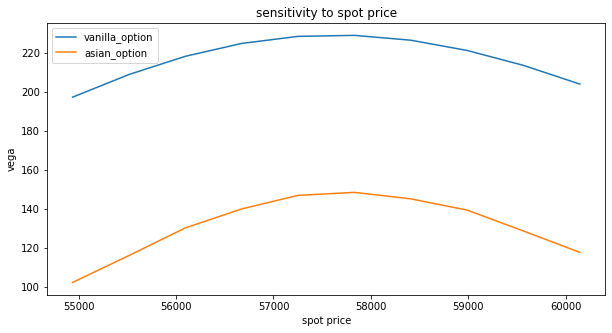

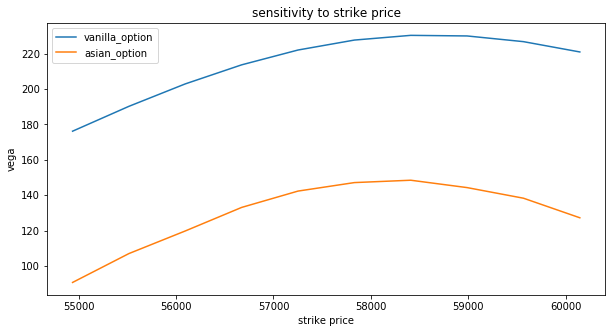

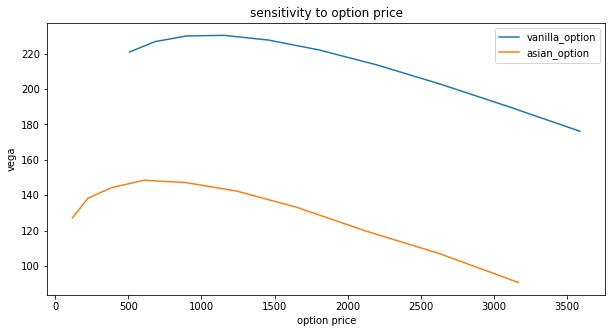

In [85]:
# Vega comparason:
range_price=np.array([57830*(0.95+0.01*j)  for j in range(10)])
vanilla_vega = []
asian_vega = []
for i in range_price:
    
    Vanilla_option = vanilla_option_vega(t=0,St=i,K=58000,T=1,r=0.01,sigma=0.05,Type="call",epsilon=0.1)
    vanilla_vega.append(Vanilla_option)
    
    Asian_option = asian_option_vega("fixed","C",S0=i,K=58000,r=0.01,sigma=0.05,T=1,step=10,M=4,epsilon=0.1)
    asian_vega.append(Asian_option)
    

    
plt.figure(figsize=(10,5))
plt.plot(range_price,vanilla_vega,label='vanilla_option')
plt.plot(range_price,asian_vega,label='asian_option')

plt.xlabel("spot price")
plt.ylabel("vega")
plt.title("sensitivity to spot price")
plt.legend()




range_price=np.array([57830*(0.95+0.01*j)  for j in range(10)])
vanilla_vega = []
asian_vega = []
for i in range_price:
    
    Vanilla_option = vanilla_option_vega(t=0,St=57830,K=i,T=1,r=0.01,sigma=0.05,Type="call",epsilon=0.1)
    vanilla_vega.append(Vanilla_option)
    
    Asian_option = asian_option_vega("fixed","C",S0=57830,K=i,r=0.01,sigma=0.05,T=1,step=10,M=4,epsilon=0.1)
    asian_vega.append(Asian_option)
    

    
plt.figure(figsize=(10,5))
plt.plot(range_price,vanilla_vega,label='vanilla_option')
plt.plot(range_price,asian_vega,label='asian_option')

plt.xlabel("strike price")
plt.ylabel("vega")
plt.title("sensitivity to strike price")
plt.legend()





range_price=np.array([57830*(0.95+0.01*j)  for j in range(10)])

vanilla_price= []
asian_price = []
vanilla_vega = []
asian_vega = []

for i in range_price:
    
    Vanilla_option = vanilla_option_vega(t=0,St=57830,K=i,T=1,r=0.01,sigma=0.05,Type="call",epsilon=0.1)
    vanilla_vega.append(Vanilla_option)
    
    Vanilla_option = BS_option_price(t=0,St=57830,K=i,T=1,r=0.01,sigma=0.05,Type="call")
    vanilla_price.append(Vanilla_option)
    
    
    Asian_option = asian_option_vega("fixed","C",S0=57830,K=i,r=0.01,sigma=0.05,T=1,step=10,M=4,epsilon=0.1)
    asian_vega.append(Asian_option)
    
    Asian_option = HW_BTM("fixed","C",S0=57830,K=i,r=0.01,sigma=0.05,T=1,step=10,M=4)
    asian_price.append(Asian_option)
    

    
plt.figure(figsize=(10,5))
plt.plot(vanilla_price,vanilla_vega,label='vanilla_option')
plt.plot(asian_price,asian_vega,label='asian_option')

plt.xlabel("option price")
plt.ylabel("vega")
plt.title("sensitivity to option price")
plt.legend()


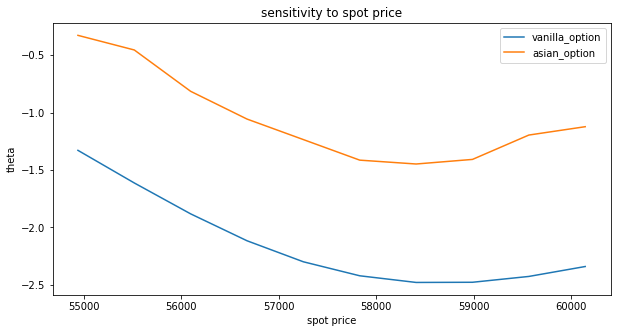

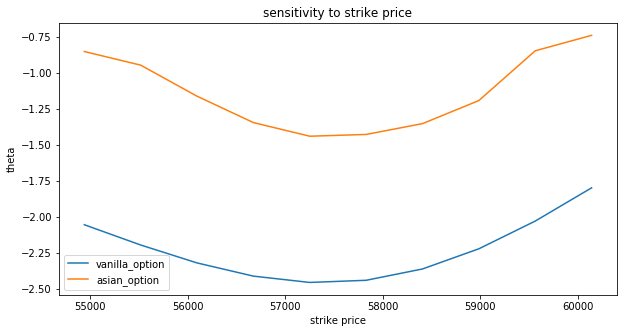

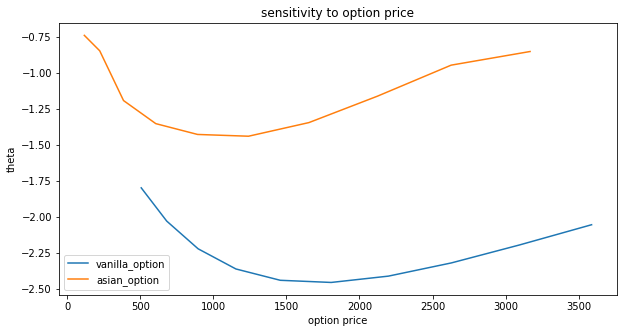

In [119]:
# Theta comparason:
range_price=np.array([57830*(0.95+0.01*j)  for j in range(10)])
vanilla_theta = []
asian_theta = []
for i in range_price:
    
    Vanilla_option = vanilla_option_theta(t=0,St=i,K=58000,T=1,r=0.01,sigma=0.05,Type="call",epsilon=0.01)
    vanilla_theta.append(Vanilla_option)
    
    Asian_option = asian_option_theta("fixed","C",S0=i,K=58000,r=0.01,sigma=0.05,T=1,step=10,M=4,epsilon=0.01)
    asian_theta.append(Asian_option)
    

    
plt.figure(figsize=(10,5))
plt.plot(range_price,vanilla_theta,label='vanilla_option')
plt.plot(range_price,asian_theta,label='asian_option')

plt.xlabel("spot price")
plt.ylabel("theta")
plt.title("sensitivity to spot price")
plt.legend()




range_price=np.array([57830*(0.95+0.01*j)  for j in range(10)])
vanilla_theta = []
asian_theta = []
for i in range_price:
    
    Vanilla_option = vanilla_option_theta(t=0,St=57830,K=i,T=1,r=0.01,sigma=0.05,Type="call",epsilon=0.01)
    vanilla_theta.append(Vanilla_option)
    
    Asian_option = asian_option_theta("fixed","C",S0=57830,K=i,r=0.01,sigma=0.05,T=1,step=10,M=4,epsilon=0.01)
    asian_theta.append(Asian_option)
    

    
plt.figure(figsize=(10,5))
plt.plot(range_price,vanilla_theta,label='vanilla_option')
plt.plot(range_price,asian_theta,label='asian_option')

plt.xlabel("strike price")
plt.ylabel("theta")
plt.title("sensitivity to strike price")
plt.legend()





range_price=np.array([57830*(0.95+0.01*j)  for j in range(10)])

vanilla_price= []
asian_price = []
vanilla_theta = []
asian_theta = []

for i in range_price:
    
    Vanilla_option = vanilla_option_theta(t=0,St=57830,K=i,T=1,r=0.01,sigma=0.05,Type="call",epsilon=0.01)
    vanilla_theta.append(Vanilla_option)
    
    Vanilla_option = BS_option_price(t=0,St=57830,K=i,T=1,r=0.01,sigma=0.05,Type="call")
    vanilla_price.append(Vanilla_option)
    
    
    Asian_option = asian_option_theta("fixed","C",S0=57830,K=i,r=0.01,sigma=0.05,T=1,step=10,M=4,epsilon=0.01)
    asian_theta.append(Asian_option)
    
    Asian_option = HW_BTM("fixed","C",S0=57830,K=i,r=0.01,sigma=0.05,T=1,step=10,M=4)
    asian_price.append(Asian_option)
    

    
plt.figure(figsize=(10,5))
plt.plot(vanilla_price,vanilla_theta,label='vanilla_option')
plt.plot(asian_price,asian_theta,label='asian_option')

plt.xlabel("option price")
plt.ylabel("theta")
plt.title("sensitivity to option price")
plt.legend()


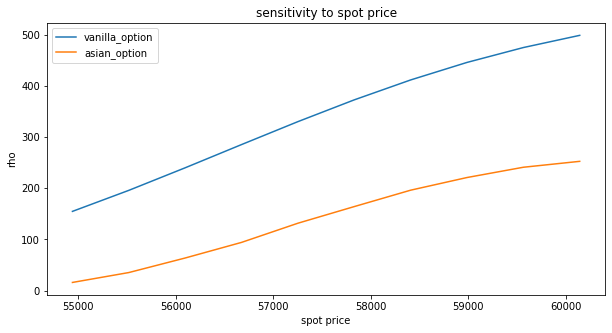

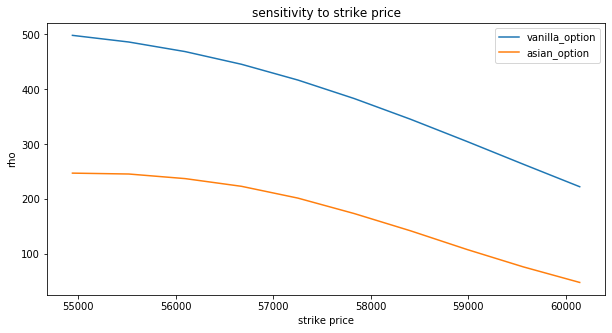

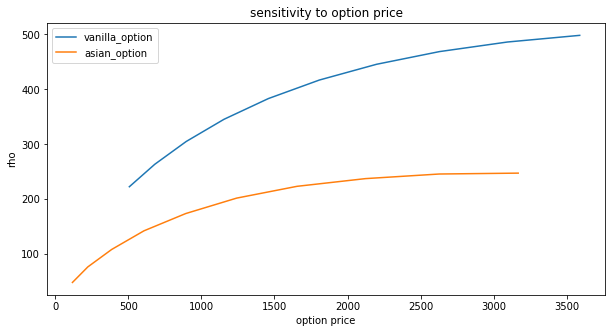

In [106]:
# Rho comparason:
range_price=np.array([57830*(0.95+0.01*j)  for j in range(10)])
vanilla_rho = []
asian_rho = []
for i in range_price:
    
    Vanilla_option = vanilla_option_rho(t=0,St=i,K=58000,T=1,r=0.01,sigma=0.05,Type="call",epsilon=0.03)
    vanilla_rho.append(Vanilla_option)
    
    Asian_option = asian_option_rho("fixed","C",S0=i,K=58000,r=0.01,sigma=0.05,T=1,step=10,M=4,epsilon=0.03)
    asian_rho.append(Asian_option)
    

    
plt.figure(figsize=(10,5))
plt.plot(range_price,vanilla_rho,label='vanilla_option')
plt.plot(range_price,asian_rho,label='asian_option')

plt.xlabel("spot price")
plt.ylabel("rho")
plt.title("sensitivity to spot price")
plt.legend()




range_price=np.array([57830*(0.95+0.01*j)  for j in range(10)])
vanilla_rho = []
asian_rho = []
for i in range_price:
    
    Vanilla_option = vanilla_option_rho(t=0,St=57830,K=i,T=1,r=0.01,sigma=0.05,Type="call",epsilon=0.03)
    vanilla_rho.append(Vanilla_option)
    
    Asian_option = asian_option_rho("fixed","C",S0=57830,K=i,r=0.01,sigma=0.05,T=1,step=10,M=4,epsilon=0.03)
    asian_rho.append(Asian_option)
    

    
plt.figure(figsize=(10,5))
plt.plot(range_price,vanilla_rho,label='vanilla_option')
plt.plot(range_price,asian_rho,label='asian_option')

plt.xlabel("strike price")
plt.ylabel("rho")
plt.title("sensitivity to strike price")
plt.legend()





range_price=np.array([57830*(0.95+0.01*j)  for j in range(10)])

vanilla_price= []
asian_price = []
vanilla_rho = []
asian_rho = []

for i in range_price:
    
    Vanilla_option = vanilla_option_rho(t=0,St=57830,K=i,T=1,r=0.01,sigma=0.05,Type="call",epsilon=0.03)
    vanilla_rho.append(Vanilla_option)
    
    Vanilla_option = BS_option_price(t=0,St=57830,K=i,T=1,r=0.01,sigma=0.05,Type="call")
    vanilla_price.append(Vanilla_option)
    
    
    Asian_option = asian_option_rho("fixed","C",S0=57830,K=i,r=0.01,sigma=0.05,T=1,step=10,M=4,epsilon=0.03)
    asian_rho.append(Asian_option)
    
    Asian_option = HW_BTM("fixed","C",S0=57830,K=i,r=0.01,sigma=0.05,T=1,step=10,M=4)
    asian_price.append(Asian_option)
    

    
plt.figure(figsize=(10,5))
plt.plot(vanilla_price,vanilla_rho,label='vanilla_option')
plt.plot(asian_price,asian_rho,label='asian_option')

plt.xlabel("option price")
plt.ylabel("rho")
plt.title("sensitivity to option price")
plt.legend()


## Compare the Greeks  of  Asian  option and Vanilla option for ETH

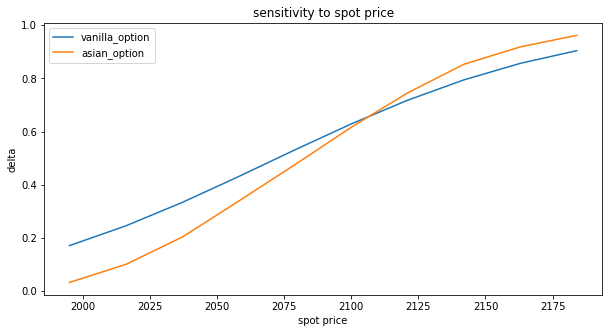

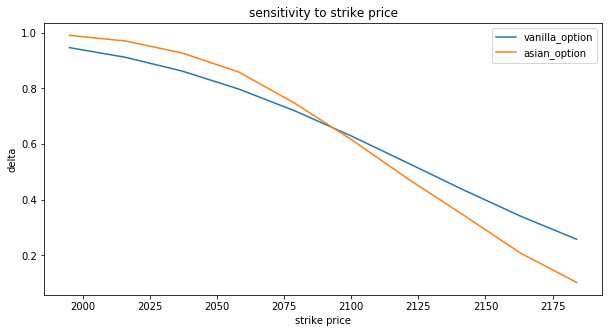

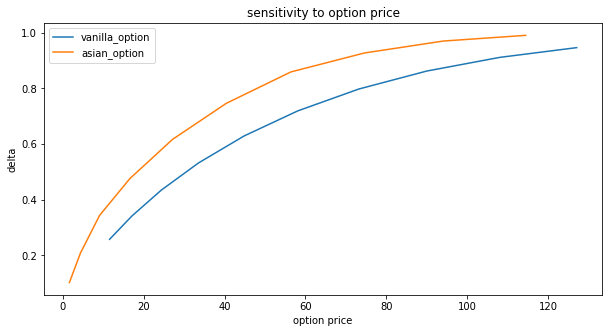

In [112]:
# Delta comparason:
range_price=np.array([2100*(0.95+0.01*j)  for j in range(10)])
vanilla_delta = []
asian_delta = []
for i in range_price:
    
    Vanilla_option = vanilla_option_delta(t=0,St=i,K=2100,T=1,r=0.01,sigma=0.04,Type="call",epsilon=10)
    vanilla_delta.append(Vanilla_option)
    
    Asian_option = asian_option_delta("fixed","C",S0=i,K=2100,r=0.01,sigma=0.04,T=1,step=10,M=4,epsilon=10)
    asian_delta.append(Asian_option)
    

    
plt.figure(figsize=(10,5))
plt.plot(range_price,vanilla_delta,label='vanilla_option')
plt.plot(range_price,asian_delta,label='asian_option')

plt.xlabel("spot price")
plt.ylabel("delta")
plt.title("sensitivity to spot price")
plt.legend()




range_price=np.array([2100*(0.95+0.01*j)  for j in range(10)])
vanilla_delta = []
asian_delta = []
for i in range_price:
    
    Vanilla_option = vanilla_option_delta(t=0,St=2100,K=i,T=1,r=0.01,sigma=0.04,Type="call",epsilon=10)
    vanilla_delta.append(Vanilla_option)
    
    Asian_option = asian_option_delta("fixed","C",S0=2100,K=i,r=0.01,sigma=0.04,T=1,step=10,M=4,epsilon=10)
    asian_delta.append(Asian_option)
    

    
plt.figure(figsize=(10,5))
plt.plot(range_price,vanilla_delta,label='vanilla_option')
plt.plot(range_price,asian_delta,label='asian_option')

plt.xlabel("strike price")
plt.ylabel("delta")
plt.title("sensitivity to strike price")
plt.legend()





range_price=np.array([2100*(0.95+0.01*j)  for j in range(10)])

vanilla_price= []
asian_price = []
vanilla_delta = []
asian_delta = []

for i in range_price:
    
    Vanilla_option = vanilla_option_delta(t=0,St=2100,K=i,T=1,r=0.01,sigma=0.04,Type="call",epsilon=10)
    vanilla_delta.append(Vanilla_option)
    
    Vanilla_option = BS_option_price(t=0,St=2100,K=i,T=1,r=0.01,sigma=0.04,Type="call")
    vanilla_price.append(Vanilla_option)
    
    
    Asian_option = asian_option_delta("fixed","C",S0=2100,K=i,r=0.01,sigma=0.04,T=1,step=10,M=4,epsilon=10)
    asian_delta.append(Asian_option)
    
    Asian_option = HW_BTM("fixed","C",S0=2100,K=i,r=0.01,sigma=0.04,T=1,step=10,M=4)
    asian_price.append(Asian_option)
    

    
plt.figure(figsize=(10,5))
plt.plot(vanilla_price,vanilla_delta,label='vanilla_option')
plt.plot(asian_price,asian_delta,label='asian_option')

plt.xlabel("option price")
plt.ylabel("delta")
plt.title("sensitivity to option price")
plt.legend()


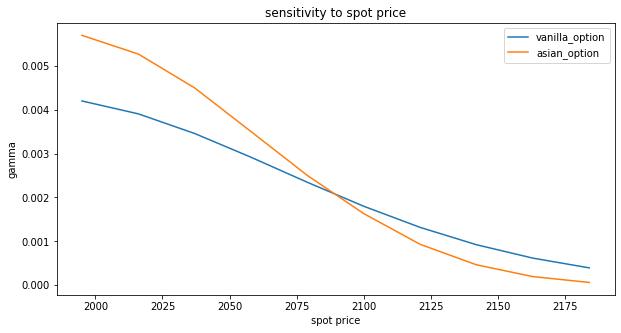

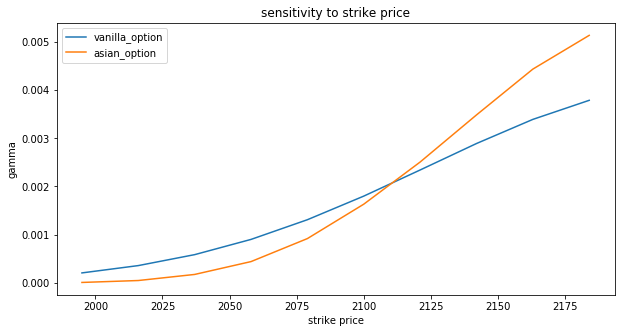

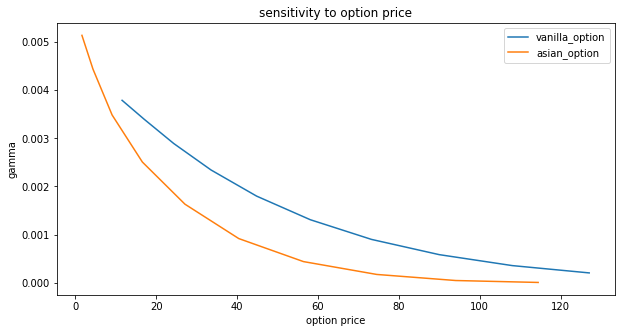

In [122]:
# Gamma comparason:
range_price=np.array([2100*(0.95+0.01*j)  for j in range(10)])
vanilla_gamma = []
asian_gamma = []
for i in range_price:
    
    Vanilla_option = vanilla_option_gamma(t=0,St=i,K=2100,T=1,r=0.01,sigma=0.04,Type="call",epsilon=100)
    vanilla_gamma.append(Vanilla_option)
    
    Asian_option = asian_option_gamma("fixed","C",S0=i,K=2100,r=0.01,sigma=0.04,T=1,step=10,M=4,epsilon=100)
    asian_gamma.append(Asian_option)
    

    
plt.figure(figsize=(10,5))
plt.plot(range_price,vanilla_gamma,label='vanilla_option')
plt.plot(range_price,asian_gamma,label='asian_option')

plt.xlabel("spot price")
plt.ylabel("gamma")
plt.title("sensitivity to spot price")
plt.legend()




range_price=np.array([2100*(0.95+0.01*j)  for j in range(10)])
vanilla_gamma = []
asian_gamma = []
for i in range_price:
    
    Vanilla_option = vanilla_option_gamma(t=0,St=2100,K=i,T=1,r=0.01,sigma=0.04,Type="call",epsilon=100)
    vanilla_gamma.append(Vanilla_option)
    
    Asian_option = asian_option_gamma("fixed","C",S0=2100,K=i,r=0.01,sigma=0.04,T=1,step=10,M=4,epsilon=100)
    asian_gamma.append(Asian_option)
    

    
plt.figure(figsize=(10,5))
plt.plot(range_price,vanilla_gamma,label='vanilla_option')
plt.plot(range_price,asian_gamma,label='asian_option')

plt.xlabel("strike price")
plt.ylabel("gamma")
plt.title("sensitivity to strike price")
plt.legend()





range_price=np.array([2100*(0.95+0.01*j)  for j in range(10)])

vanilla_price= []
asian_price = []
vanilla_gamma = []
asian_gamma = []

for i in range_price:
    
    Vanilla_option = vanilla_option_gamma(t=0,St=2100,K=i,T=1,r=0.01,sigma=0.04,Type="call",epsilon=100)
    vanilla_gamma.append(Vanilla_option)
    
    Vanilla_option = BS_option_price(t=0,St=2100,K=i,T=1,r=0.01,sigma=0.04,Type="call")
    vanilla_price.append(Vanilla_option)
    
    
    Asian_option = asian_option_gamma("fixed","C",S0=2100,K=i,r=0.01,sigma=0.04,T=1,step=10,M=4,epsilon=100)
    asian_gamma.append(Asian_option)
    
    Asian_option = HW_BTM("fixed","C",S0=2100,K=i,r=0.01,sigma=0.04,T=1,step=10,M=4)
    asian_price.append(Asian_option)
    

    
plt.figure(figsize=(10,5))
plt.plot(vanilla_price,vanilla_gamma,label='vanilla_option')
plt.plot(asian_price,asian_gamma,label='asian_option')

plt.xlabel("option price")
plt.ylabel("gamma")
plt.title("sensitivity to option price")
plt.legend()


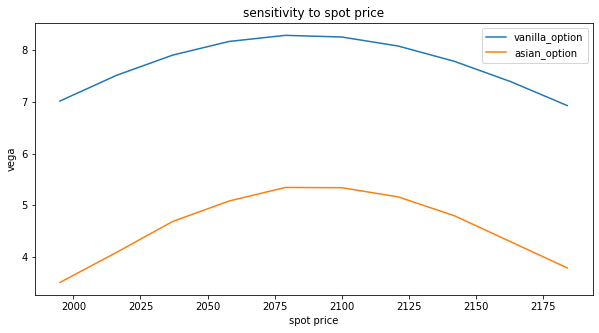

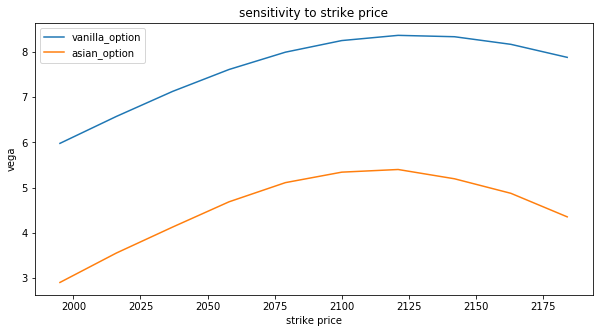

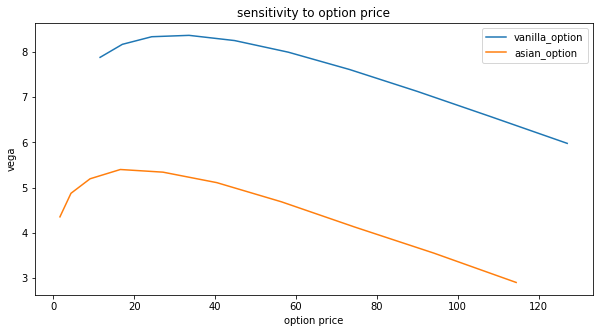

In [114]:
# Vega comparason:
range_price=np.array([2100*(0.95+0.01*j)  for j in range(10)])
vanilla_vega = []
asian_vega = []
for i in range_price:
    
    Vanilla_option = vanilla_option_vega(t=0,St=i,K=2100,T=1,r=0.01,sigma=0.04,Type="call",epsilon=0.1)
    vanilla_vega.append(Vanilla_option)
    
    Asian_option = asian_option_vega("fixed","C",S0=i,K=2100,r=0.01,sigma=0.04,T=1,step=10,M=4,epsilon=0.1)
    asian_vega.append(Asian_option)
    

    
plt.figure(figsize=(10,5))
plt.plot(range_price,vanilla_vega,label='vanilla_option')
plt.plot(range_price,asian_vega,label='asian_option')

plt.xlabel("spot price")
plt.ylabel("vega")
plt.title("sensitivity to spot price")
plt.legend()




range_price=np.array([2100*(0.95+0.01*j)  for j in range(10)])
vanilla_vega = []
asian_vega = []
for i in range_price:
    
    Vanilla_option = vanilla_option_vega(t=0,St=2100,K=i,T=1,r=0.01,sigma=0.04,Type="call",epsilon=0.1)
    vanilla_vega.append(Vanilla_option)
    
    Asian_option = asian_option_vega("fixed","C",S0=2100,K=i,r=0.01,sigma=0.04,T=1,step=10,M=4,epsilon=0.1)
    asian_vega.append(Asian_option)
    

    
plt.figure(figsize=(10,5))
plt.plot(range_price,vanilla_vega,label='vanilla_option')
plt.plot(range_price,asian_vega,label='asian_option')

plt.xlabel("strike price")
plt.ylabel("vega")
plt.title("sensitivity to strike price")
plt.legend()





range_price=np.array([2100*(0.95+0.01*j)  for j in range(10)])

vanilla_price= []
asian_price = []
vanilla_vega = []
asian_vega = []

for i in range_price:
    
    Vanilla_option = vanilla_option_vega(t=0,St=2100,K=i,T=1,r=0.01,sigma=0.04,Type="call",epsilon=0.1)
    vanilla_vega.append(Vanilla_option)
    
    Vanilla_option = BS_option_price(t=0,St=2100,K=i,T=1,r=0.01,sigma=0.04,Type="call")
    vanilla_price.append(Vanilla_option)
    
    
    Asian_option = asian_option_vega("fixed","C",S0=2100,K=i,r=0.01,sigma=0.04,T=1,step=10,M=4,epsilon=0.1)
    asian_vega.append(Asian_option)
    
    Asian_option = HW_BTM("fixed","C",S0=2100,K=i,r=0.01,sigma=0.04,T=1,step=10,M=4)
    asian_price.append(Asian_option)
    

    
plt.figure(figsize=(10,5))
plt.plot(vanilla_price,vanilla_vega,label='vanilla_option')
plt.plot(asian_price,asian_vega,label='asian_option')

plt.xlabel("option price")
plt.ylabel("vega")
plt.title("sensitivity to option price")
plt.legend()


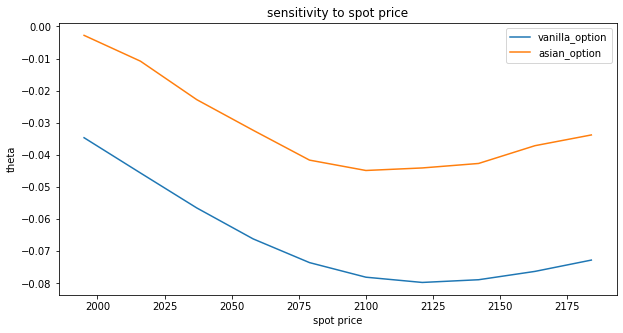

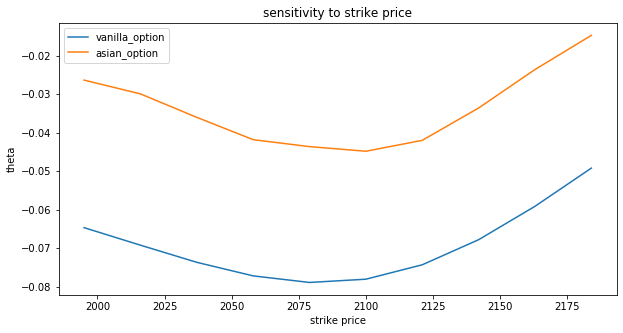

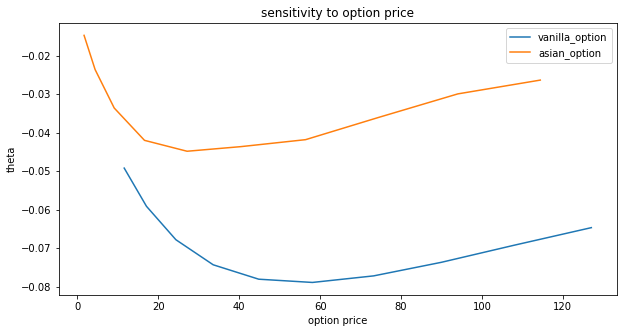

In [120]:
# Theta comparason:
range_price=np.array([2100*(0.95+0.01*j)  for j in range(10)])
vanilla_theta = []
asian_theta = []
for i in range_price:
    
    Vanilla_option = vanilla_option_theta(t=0,St=i,K=2100,T=1,r=0.01,sigma=0.04,Type="call",epsilon=0.01)
    vanilla_theta.append(Vanilla_option)
    
    Asian_option = asian_option_theta("fixed","C",S0=i,K=2100,r=0.01,sigma=0.04,T=1,step=10,M=4,epsilon=0.01)
    asian_theta.append(Asian_option)
    

    
plt.figure(figsize=(10,5))
plt.plot(range_price,vanilla_theta,label='vanilla_option')
plt.plot(range_price,asian_theta,label='asian_option')

plt.xlabel("spot price")
plt.ylabel("theta")
plt.title("sensitivity to spot price")
plt.legend()




range_price=np.array([2100*(0.95+0.01*j)  for j in range(10)])
vanilla_theta = []
asian_theta = []
for i in range_price:
    
    Vanilla_option = vanilla_option_theta(t=0,St=2100,K=i,T=1,r=0.01,sigma=0.04,Type="call",epsilon=0.01)
    vanilla_theta.append(Vanilla_option)
    
    Asian_option = asian_option_theta("fixed","C",S0=2100,K=i,r=0.01,sigma=0.04,T=1,step=10,M=4,epsilon=0.01)
    asian_theta.append(Asian_option)
    

    
plt.figure(figsize=(10,5))
plt.plot(range_price,vanilla_theta,label='vanilla_option')
plt.plot(range_price,asian_theta,label='asian_option')

plt.xlabel("strike price")
plt.ylabel("theta")
plt.title("sensitivity to strike price")
plt.legend()





range_price=np.array([2100*(0.95+0.01*j)  for j in range(10)])

vanilla_price= []
asian_price = []
vanilla_theta = []
asian_theta = []

for i in range_price:
    
    Vanilla_option = vanilla_option_theta(t=0,St=2100,K=i,T=1,r=0.01,sigma=0.04,Type="call",epsilon=0.01)
    vanilla_theta.append(Vanilla_option)
    
    Vanilla_option = BS_option_price(t=0,St=2100,K=i,T=1,r=0.01,sigma=0.04,Type="call")
    vanilla_price.append(Vanilla_option)
    
    
    Asian_option = asian_option_theta("fixed","C",S0=2100,K=i,r=0.01,sigma=0.04,T=1,step=10,M=4,epsilon=0.01)
    asian_theta.append(Asian_option)
    
    Asian_option = HW_BTM("fixed","C",S0=2100,K=i,r=0.01,sigma=0.04,T=1,step=10,M=4)
    asian_price.append(Asian_option)
    

    
plt.figure(figsize=(10,5))
plt.plot(vanilla_price,vanilla_theta,label='vanilla_option')
plt.plot(asian_price,asian_theta,label='asian_option')

plt.xlabel("option price")
plt.ylabel("theta")
plt.title("sensitivity to option price")
plt.legend()


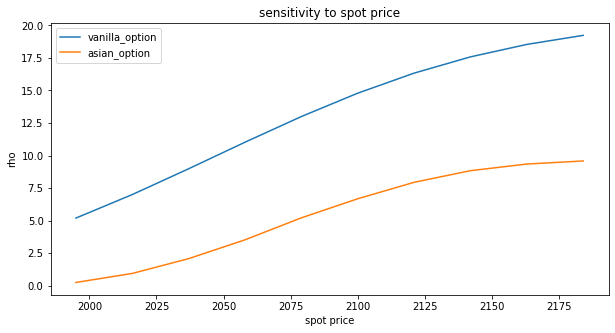

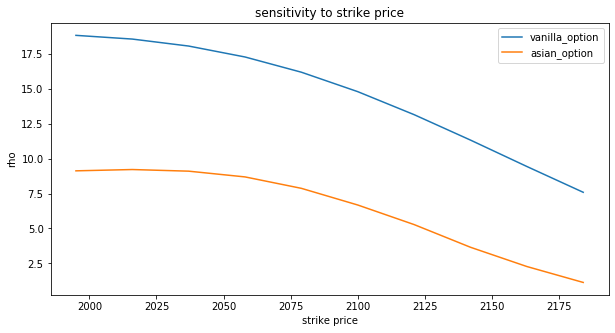

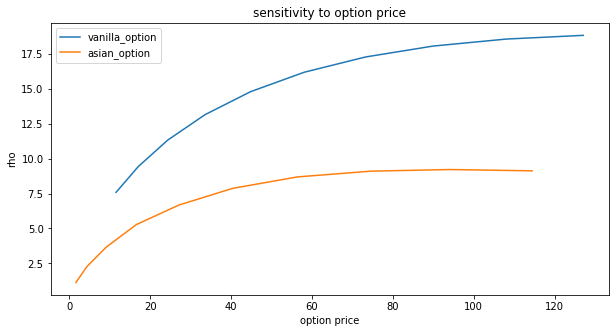

In [116]:
# Rho comparason:
range_price=np.array([2100*(0.95+0.01*j)  for j in range(10)])
vanilla_rho = []
asian_rho = []
for i in range_price:
    
    Vanilla_option = vanilla_option_rho(t=0,St=i,K=2100,T=1,r=0.01,sigma=0.04,Type="call",epsilon=0.03)
    vanilla_rho.append(Vanilla_option)
    
    Asian_option = asian_option_rho("fixed","C",S0=i,K=2100,r=0.01,sigma=0.04,T=1,step=10,M=4,epsilon=0.03)
    asian_rho.append(Asian_option)
    

    
plt.figure(figsize=(10,5))
plt.plot(range_price,vanilla_rho,label='vanilla_option')
plt.plot(range_price,asian_rho,label='asian_option')

plt.xlabel("spot price")
plt.ylabel("rho")
plt.title("sensitivity to spot price")
plt.legend()




range_price=np.array([2100*(0.95+0.01*j)  for j in range(10)])
vanilla_rho = []
asian_rho = []
for i in range_price:
    
    Vanilla_option = vanilla_option_rho(t=0,St=2100,K=i,T=1,r=0.01,sigma=0.04,Type="call",epsilon=0.03)
    vanilla_rho.append(Vanilla_option)
    
    Asian_option = asian_option_rho("fixed","C",S0=2100,K=i,r=0.01,sigma=0.04,T=1,step=10,M=4,epsilon=0.03)
    asian_rho.append(Asian_option)
    

    
plt.figure(figsize=(10,5))
plt.plot(range_price,vanilla_rho,label='vanilla_option')
plt.plot(range_price,asian_rho,label='asian_option')

plt.xlabel("strike price")
plt.ylabel("rho")
plt.title("sensitivity to strike price")
plt.legend()





range_price=np.array([2100*(0.95+0.01*j)  for j in range(10)])

vanilla_price= []
asian_price = []
vanilla_rho = []
asian_rho = []

for i in range_price:
    
    Vanilla_option = vanilla_option_rho(t=0,St=2100,K=i,T=1,r=0.01,sigma=0.04,Type="call",epsilon=0.03)
    vanilla_rho.append(Vanilla_option)
    
    Vanilla_option = BS_option_price(t=0,St=2100,K=i,T=1,r=0.01,sigma=0.04,Type="call")
    vanilla_price.append(Vanilla_option)
    
    
    Asian_option = asian_option_rho("fixed","C",S0=2100,K=i,r=0.01,sigma=0.04,T=1,step=10,M=4,epsilon=0.03)
    asian_rho.append(Asian_option)
    
    Asian_option = HW_BTM("fixed","C",S0=2100,K=i,r=0.01,sigma=0.04,T=1,step=10,M=4)
    asian_price.append(Asian_option)
    

    
plt.figure(figsize=(10,5))
plt.plot(vanilla_price,vanilla_rho,label='vanilla_option')
plt.plot(asian_price,asian_rho,label='asian_option')

plt.xlabel("option price")
plt.ylabel("rho")
plt.title("sensitivity to option price")
plt.legend()
